In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In the first step, the pixel values of the images are normalized to be between 0 and 1 by dividing each pixel value by the maximum possible pixel value (255). Normalizing the data is a common practice in machine learning as it helps to avoid issues such as vanishing or exploding gradients during training.

In the second step, the labels (digits) are converted to binary format, where the label corresponding to digit 1 is set to 1 and the label corresponding to digit 7 is set to 0. This is because we are performing binary classification (identifying whether the image represents a 1 or not), and the logistic regression model we trained earlier is designed for binary classification. By converting the labels to binary format, we can use the same model to classify both digits 1 and 7.


In this code, we are converting the labels into a binary format. For logistic regression, it is easier to work with binary data where the target variable takes only two values. In this case, we are interested in identifying whether an image is of the digit 1 or not, so we need to convert the labels to 0 or 1.

To do this, we use the comparison operator '==' to check if each label is equal to 1 or not. This returns an array of boolean values where True corresponds to labels that are equal to 1 and False corresponds to labels that are not equal to 1. Then we use the 'astype' method to convert this array of booleans to an array of integers, where True is converted to 1 and False is converted to 0.

By doing this, we have transformed the labels from a multi-class problem to a binary classification problem, where 1 represents the digit we are interested in and 0 represents all other digits.

In [2]:
##############################################################################################################

 Shuffle the Data
data = data.sample(frac=1).reset_index(drop=True)  # It shuffles the rows of the data DataFrame randomly. 
data = data.sample(frac=1, random_state=42)          #The frac=1 argument means to sample the entire DataFrame, and 
                                                     #random_state=42 sets the random seed for reproducibility.

 Shuffle the data
data = data.to_numpy()
np.random.shuffle(data)
data = pd.DataFrame(data, columns=data.columns)

 Only keep the rows where the label is 1 or 7
data = data.loc[data['label'].isin([1, 7])]

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
data = pd.read_csv('mnist_test.csv')

# Filter samples with labels 1 and 7
data = data[(data['label'] == 1) | (data['label'] == 7)]

In [4]:
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9979,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9984,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9990,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = data.sample(frac=1, random_state=42)  

In [6]:
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
3609,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7176,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5880,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5166,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9950,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7632,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5072,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5232,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5999,7,0,0,0,0,0,0,0,0,0,...,61,253,130,0,0,0,0,0,0,0


In [7]:
# Convert data to a numpy array and shuffle
# data = data.to_numpy()
# np.random.shuffle(data)

# Convert data back to a DataFrame
# data = pd.DataFrame.from_records(data, columns=data.dtype.names)
# data = data.rename(columns={0: "label"})

In [8]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    data.drop("label", axis=1), data["label"], test_size=0.2, random_state=42)

In [9]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert the labels to binary format
Y_train = (Y_train == 1).astype(int)
Y_test = (Y_test == 1).astype(int)

In [10]:
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
3609,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7176,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5880,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5166,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9950,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7632,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5072,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5232,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5999,7,0,0,0,0,0,0,0,0,0,...,61,253,130,0,0,0,0,0,0,0


In [11]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1730, 784) (1730,) (433, 784) (433,)


In [12]:
def sigmoid(X):
    return 1.0/(1.0 + np.exp(-X))

In [13]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [14]:
def cost_function(X, Y, theta):
    h_theta = hypothesis(X, theta)
    cost = np.mean(Y*np.log(h_theta) + (1 - Y)*np.log(1 - h_theta))
    cost = cost*-1

    return cost

In [15]:
def gradient(X, Y, theta):

    h_theta = hypothesis(X, theta)

    grad = np.dot(X.T, (Y - h_theta))

    return grad/X.shape[0]

In [16]:
def gradient_descent(X, Y, learning_rate = 0.001, max_steps = 500):

    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_epoch = []

    for i in range(max_steps):

        grad = gradient(X, Y, theta)

        e = cost_function(X, Y, theta)
        cost_epoch.append(e)

        theta = theta + learning_rate*grad

    return (theta, cost_epoch)

In [17]:
ones = np.ones((X_train.shape[0], 1))
X_train = np.hstack((ones, X_train))
print(X_train[:4, :4], X_train.shape)
# Y_train = Y_train.reshape((-1, 1))
Y_train = Y_train.to_numpy().reshape((-1, 1))


[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]] (1730, 785)


In [18]:
theta, cost_epoch = gradient_descent(X_train, Y_train, learning_rate=0.001, max_steps = 1000)

In [19]:
cost_epoch[-10:]

[0.20913073380310168,
 0.2090122855225591,
 0.20889402220052009,
 0.208775943394891,
 0.20865804866497348,
 0.20854033757145915,
 0.2084228096764244,
 0.20830546454332458,
 0.20818830173698907,
 0.20807132082361585]

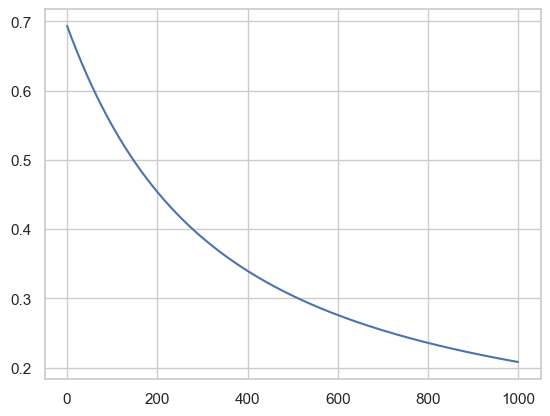

In [20]:
plt.plot(cost_epoch)

In [21]:
ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))
print(X_test[:4, :4], X_test.shape)
Y_test = np.array(Y_test)
Y_test = Y_test.reshape((-1, 1))
# Y_train = Y_train.to_numpy().reshape((-1, 1))

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]] (433, 785)


In [22]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1730, 785) (1730, 1) (433, 785) (433, 1)


In [23]:
def predict(X, theta):
    h_theta = hypothesis(X, theta)
    output = np.zeros(h_theta.shape)

    output[h_theta>0.5] = 1
    output = output.astype('int')

    return output

In [24]:
train_preds = predict(X_train, theta)
test_preds = predict(X_test, theta)

In [26]:
for i in range(len(test_preds)):
    print(test_preds[i], Y_test[i])

[1] [1]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[1] [1]
[1] [1]
[0] [0]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[1] [1]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[1] [1]
[1] [1]
[0] [0]
[0] [0]
[1] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[1] [0]
[1] [1]
[0] [0]
[1] [1]
[0] [0]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[1] [1]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[1] [1]
[1] [1]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[0] [0]
[1] [1]
[0] [0]
[1] [1]
[0] [0]
[1] [1]


In [27]:
def accuracy(preds, labels):
    labels = labels.astype('int')
    print(np.sum(preds == labels)/labels.shape[0])

In [29]:
accuracy(test_preds, Y_test)

0.9722863741339491


In [30]:
accuracy(train_preds, Y_train)

0.9676300578034682
